In [18]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import ace_tools as tools

Análisis Exploratorio de Datos (EDA)
i. Tipo de dato
Primero, verificamos los tipos de datos y su clasificación en el DataFrame:

In [2]:
data = pd.read_csv("./Barcelona_rent_price.csv", delimiter=';')

In [3]:
data.info()  #complementar con informacion ya explorada

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2311 entries, 0 to 2310
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                2311 non-null   int64  
 1   Trimester           2311 non-null   int64  
 2   District            2311 non-null   object 
 3   Neighbourhood       2311 non-null   object 
 4   Price (euro/month)  2311 non-null   float64
 5   Price (euro/m2)     2311 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 108.5+ KB


ii. Estadística descriptiva
Calculamos las estadísticas descriptivas para resumir la tendencia central, dispersión y forma de la distribución de los datos:

In [ ]:
data.describe()  #complementar con informacion ya explorada

iii. Función de distribución
Visualizamos la distribución de la variable objetivo "Price (euro/m2)" utilizando un histograma:

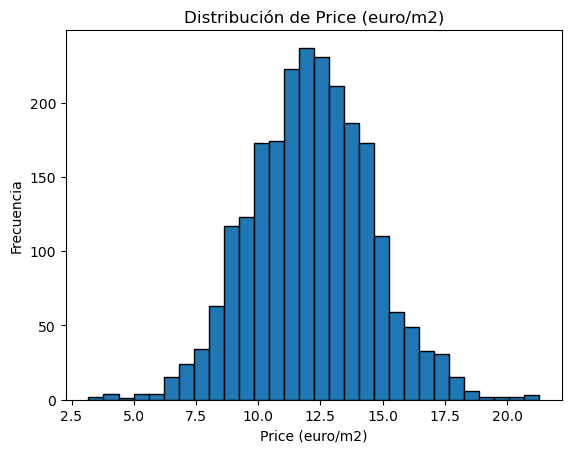

In [4]:
plt.hist(data['Price (euro/m2)'], bins=30, edgecolor='k')
plt.title('Distribución de Price (euro/m2)')
plt.xlabel('Price (euro/m2)')
plt.ylabel('Frecuencia')
plt.show()

iv. Interpretar la variable objetivo en base a la función de distribución
Creamos un boxplot para identificar visualmente la presencia de outliers en "Price (euro/m2)":

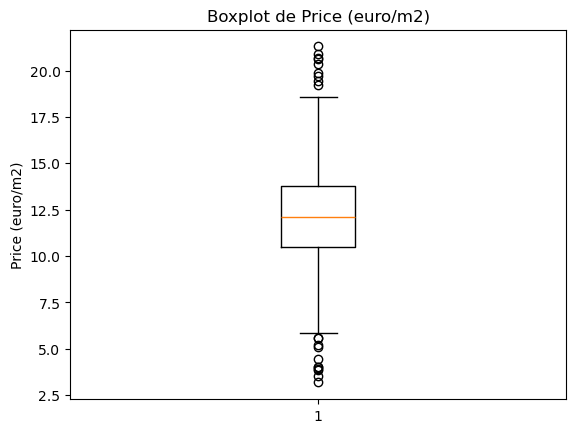

In [5]:
plt.boxplot(data['Price (euro/m2)'])
plt.title('Boxplot de Price (euro/m2)')
plt.ylabel('Price (euro/m2)')
plt.show()

Corrección o imputación de outliers
Reemplazamos los outliers con kmeans

In [6]:
# Selección de columnas numéricas
numeric_data = data.select_dtypes(include=['float64', 'int64'])

In [7]:
# Escalar los datos
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(numeric_data)

calculo de tamaño de clusters

In [8]:
# Calcular SSE para diferentes valores de k
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse[k] = kmeans.inertia_  # SSE para el número de clústeres k

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

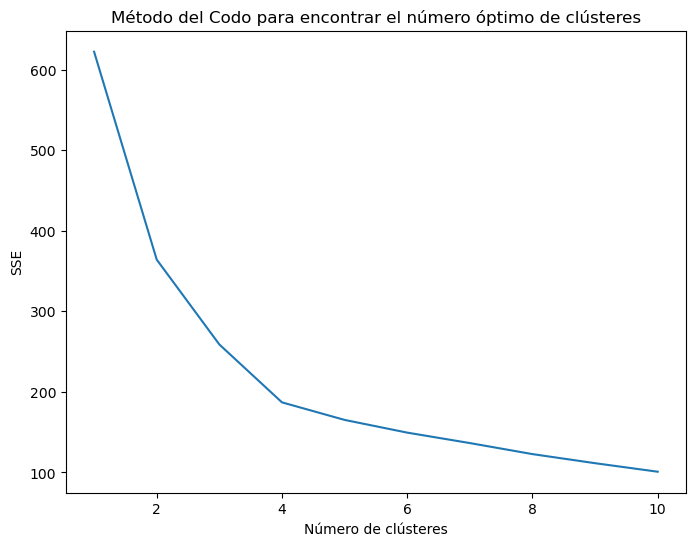

In [9]:

# Graficar SSE vs. k
plt.figure(figsize=(8, 6))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Número de clústeres")
plt.ylabel("SSE")
plt.title("Método del Codo para encontrar el número óptimo de clústeres")
plt.show()

In [10]:
# Aplicar K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [11]:
# Añadir los clusters al dataframe original
data['Cluster'] = clusters

In [12]:

# Calcular la distancia de cada punto al centroide del clúster
data['Distance_to_Centroid'] = np.linalg.norm(data_scaled - kmeans.cluster_centers_[clusters], axis=1)

In [13]:
# Definir umbral para considerar un punto como outlier
threshold = data['Distance_to_Centroid'].quantile(0.95)

In [28]:
# Identificar outliers
data['Is_Outlier'] = data['Distance_to_Centroid'] > threshold
# Contar el número de outliers identificados
num_outliers = data['Is_Outlier'].sum()
# Contar el número total de registros en el dataset original
total_records = len(data)
# Calcular el porcentaje de outliers
percentage_outliers = (num_outliers / total_records) * 100
# Mostrar los resultados
print(f'Número de outliers: {num_outliers}')
print(f'Número total de registros: {total_records}')
print(f'Porcentaje de outliers: {percentage_outliers:.2f}%')

Número de outliers: 116
Número total de registros: 2311
Porcentaje de outliers: 5.02%


In [15]:
# Visualización de outliers
outliers = data[data['Is_Outlier']]

In [21]:
outliers_info = outliers[['Year', 'Trimester', 'District', 'Neighbourhood', 'Price (euro/m2)', 'Cluster', 'Distance_to_Centroid']]
print(outliers_info.head())

     Year  Trimester             District    Neighbourhood  Price (euro/m2)  \
44   2014          1           Nou Barris      Can Peguera             6.03   
87   2014          2            Les Corts        Pedralbes            12.52   
90   2014          2  Sarria-Sant Gervasi  les Tres Torres            14.40   
122  2014          2          Sant Andreu    Baro de Viver             4.03   
157  2014          3            Les Corts        Pedralbes            12.06   

     Cluster  Distance_to_Centroid  
44         2              0.447767  
87         2              0.492854  
90         2              0.472023  
122        2              0.522009  
157        1              0.481651  


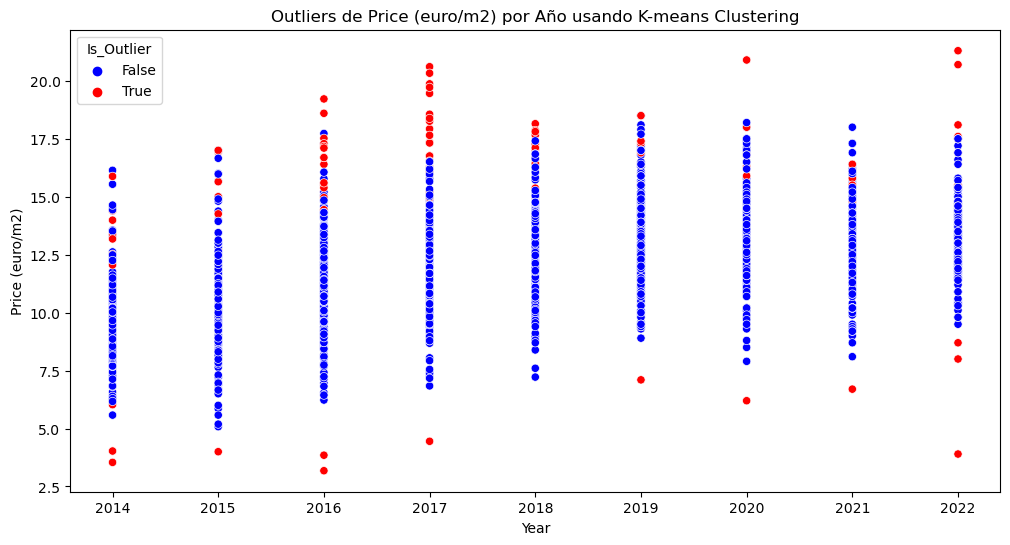

In [20]:
# Visualizar los outliers por año
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='Year', y='Price (euro/m2)', hue='Is_Outlier', palette={True: 'red', False: 'blue'})
plt.title('Outliers de Price (euro/m2) por Año usando K-means Clustering')
plt.show()

In [22]:
# Eliminar outliers antes de continuar con el modelado
data_clean = data[~data['Is_Outlier']]

In [23]:
# Binarización de variables categóricas
data_encoded = pd.get_dummies(data_clean, columns=['District', 'Neighbourhood'])

In [31]:
# División Train Test
X = data_encoded.drop('Price (euro/m2)', axis=1)
y = data_encoded['Price (euro/m2)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X

,Year,Trimester,Price (euro/month),Cluster,Distance_to_Centroid,Is_Outlier,District_Ciutat Vella,District_Eixample,District_Gracia,District_Horta-Guinardo,...,Neighbourhood_la Teixonera,Neighbourhood_la Trinitat Nova,Neighbourhood_la Trinitat Vella,Neighbourhood_la Vall d'Hebron,Neighbourhood_la Verneda i la Pau,Neighbourhood_la Vila Olimpica del Poblenou,Neighbourhood_la Vila de Gracia,Neighbourhood_les Corts,Neighbourhood_les Roquetes,Neighbourhood_les Tres Torres
0,2014,1,589.55,2,0.277363,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2014,1,712.79,2,0.271274,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2014,1,540.71,2,0.347847,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2014,1,673.44,2,0.271767,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2014,1,736.09,2,0.272299,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2306,2022,2,1238.70,3,0.406321,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2307,2022,2,779.20,3,0.300802,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2308,2022,2,1032.90,3,0.301285,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2309,2022,2,843.00,3,0.298047,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [25]:
# Transformación (Escalado), previo al procesamiento debemos escalar los datos para llevarlos a una escala comun
# Mejora del Rendimiento del Modelo,Convergencia Más Rápida,Equidad de las Características.
#Metodos comunes de escalado: Min-max scaling(normalizacion) , standard scaling(estandarizacion), robust scaling
# en nuestro caso seleccionaremos  MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
# Modelo, el modelo selesccionado es de regresion lineal:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [27]:
# Evaluación del Modelo
y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}, MSE: {mse}, R²: {r2}')

MAE: 0.4670750284738041, MSE: 0.4448386491136833, R²: 0.914783518757025


El ajuste del modelo mejora considerablemente, pasamos de un 0.84 al 0.91 utilizando kmeans para gestion de outliers